In [1]:
"""
-----------------------------------------------------------------------------
MNIST digit data reading helper
-----------------------------------------------------------------------------
AUTHOR: Soumitra Samanta (soumitra.samanta@gm.rkmvu.ac.in)
-----------------------------------------------------------------------------
"""

import gzip
import numpy as np
import matplotlib.pyplot as plt


# Read MNIST data:
There are many [ways](https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python) you can read the MNIST data. Here is a [way](https://stackoverflow.com/a/62781370) to read all the information.

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


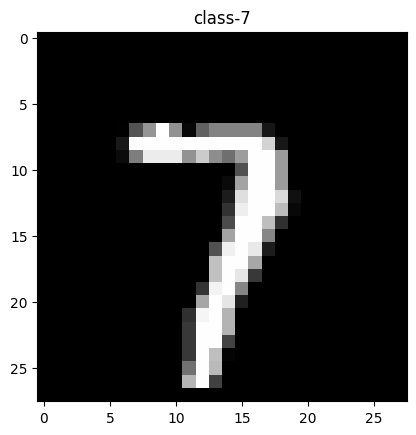

Train image 36178-th sample 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1  83 148 254 145   7  98 130 130 130 130  22
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  25 253 2

In [2]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


dataset_path = '/home/sysadm/knn_assgn_materials/'# Change your data path

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)
print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)
print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))

rand_ids = np.random.choice(train_images.shape[0])
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

print('Train image {}-th sample ' .format(rand_ids))
print(train_images[rand_ids, :, :])


print(train_image_filename)


# Extract 20% data from thhe training data as a validation set. <font color='red'>Please do not use some standard function from scikit-learn or others!</font>

In [3]:
# My validation set extraction code 
def valid_creation(images,labels,percent):
   
    indices=np.random.choice(images.shape[0],size=int(percent*labels.shape[0]),replace=False)
    validation_image_set=images[indices,:,:]
    validation_labels=labels[indices]
    new_train_image=np.delete(images,indices,axis=0)
    new_train_labels=np.delete(labels,indices)
    
    print(f"valid_set size is:{validation_image_set.shape},valid_label_size={validation_labels.shape},new_train_image_size:{new_train_image.shape},new_train_label:{new_train_labels.shape}")

    return validation_image_set,validation_labels,new_train_image,new_train_labels
 

# Implement k-NN classification rule/algorithm, we have discussed in our class. <font color='red'>Please do not use some standard function from scikit-learn or others!</font>

In [4]:
x_valid,label_valid,x_train,label_train=valid_creation(train_images,train_labels,0.2)

valid_set size is:(12000, 28, 28),valid_label_size=(12000,),new_train_image_size:(48000, 28, 28),new_train_label:(48000,)


In [5]:
# Define the distance calculation functions
def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2), axis=1)

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2, axis=1))

def chebyshev_distance(x1, x2):
    return np.max(np.abs(x1 - x2), axis=1)

# Function to find the 25 nearest neighbors for a single test point
def find_25_nearest_neighbors(X_train, test_point, p):
    if p == 1:
        distances = np.sum(np.abs(X_train - test_point), axis=1)
    elif p == 2:
        distances = np.sqrt(np.sum((X_train - test_point) ** 2, axis=1))
    elif p == np.inf:
        distances = np.max(np.abs(X_train - test_point), axis=1)
    
   
    nearest_indices = np.argsort(distances)[:25]
    return nearest_indices, distances[nearest_indices]

# KNN classification for a range of k values
def knn_classifer(X_train, y_train, X_test, y_test, p=[1, 2, np.inf], k=list(range(1,26,2))):
    results = {}
    for ps in p:
        print(f"Processing for p={ps}")
        all_nearest_indices = []
        for test_point in X_test:
            nearest_indices, _ = find_25_nearest_neighbors(X_train, test_point, ps)
            all_nearest_indices.append(nearest_indices)
       
        for j in k:
            correct_predictions = 0
            for i, test_point in enumerate(X_test):
                nearest_indices = all_nearest_indices[i]
                nearest_labels = y_train[nearest_indices][:j]
                predicted_label = np.argmax(np.bincount(nearest_labels))
                if predicted_label == y_test[i]:
                    correct_predictions += 1
            accuracy = correct_predictions / len(X_test)
            results[(ps, j)] = accuracy
            print(f"Accuracy for p={ps}, k={j}: {accuracy}")
    return results



In [8]:
#Applying the model on validation dataset created from training dataset.

#Reshaping the train data of (48000,28,28) to (48000,784) and similary for validation data and changing the dtype to float to get precision on distance calculation.
x_train=x_train.reshape(len(x_train), -1).astype(np.float32)
x_valid=x_valid.reshape(len(x_valid), -1).astype(np.float32)
# Test the function
results = knn_classifer(x_train,label_train, x_valid,label_valid)
print("Results:", results) #Runtime:60mins 53.8 sec

Processing for p=1
Accuracy for p=1, k=1: 0.9664166666666667
Accuracy for p=1, k=3: 0.9673333333333334
Accuracy for p=1, k=5: 0.967
Accuracy for p=1, k=7: 0.9659166666666666
Accuracy for p=1, k=9: 0.9635
Accuracy for p=1, k=11: 0.9625833333333333
Accuracy for p=1, k=13: 0.9593333333333334
Accuracy for p=1, k=15: 0.9583333333333334
Accuracy for p=1, k=17: 0.9568333333333333
Accuracy for p=1, k=19: 0.956
Accuracy for p=1, k=21: 0.9548333333333333
Accuracy for p=1, k=23: 0.9539166666666666
Accuracy for p=1, k=25: 0.95325
Processing for p=2
Accuracy for p=2, k=1: 0.9735
Accuracy for p=2, k=3: 0.97325
Accuracy for p=2, k=5: 0.97325
Accuracy for p=2, k=7: 0.9716666666666667
Accuracy for p=2, k=9: 0.97125
Accuracy for p=2, k=11: 0.9695
Accuracy for p=2, k=13: 0.9673333333333334
Accuracy for p=2, k=15: 0.9660833333333333
Accuracy for p=2, k=17: 0.9645833333333333
Accuracy for p=2, k=19: 0.9639166666666666
Accuracy for p=2, k=21: 0.9628333333333333
Accuracy for p=2, k=23: 0.9616666666666667
Acc

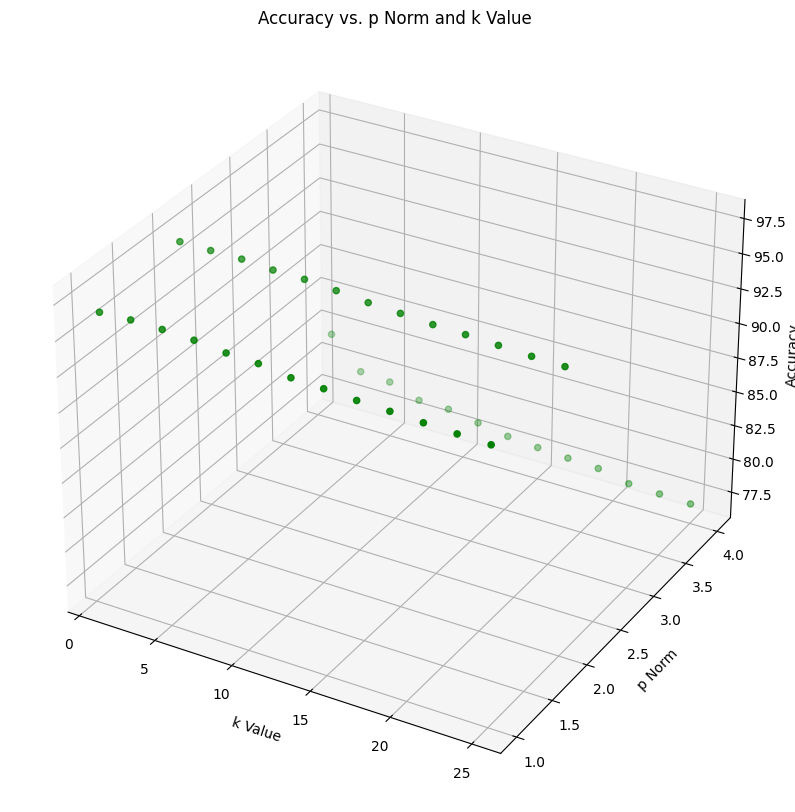

In [9]:
#Using the results to create a 3d plot.
results= {(1, 1): 0.9664166666666667, (1, 3): 0.9673333333333334, (1, 5): 0.967, (1, 7): 0.9659166666666666, (1, 9): 0.9635, (1, 11): 0.9625833333333333, (1, 13): 0.9593333333333334, (1, 15): 0.9583333333333334, (1, 17): 0.9568333333333333, (1, 19): 0.956, (1, 21): 0.9548333333333333, (1, 23): 0.9539166666666666, (1, 25): 0.95325, 
          (2, 1): 0.9735, (2, 3): 0.97325, (2, 5): 0.97325, (2, 7): 0.9716666666666667, (2, 9): 0.97125, (2, 11): 0.9695, (2, 13): 0.9673333333333334, (2, 15): 0.9660833333333333, (2, 17): 0.9645833333333333, (2, 19): 0.9639166666666666, (2, 21): 0.9628333333333333, (2, 23): 0.9616666666666667, (2, 25): 0.961, 
           (float('inf'), 1): 0.82125, (float('inf'), 3): 0.7988333333333333, (float('inf'), 5): 0.79725, (float('inf'), 7): 0.7895833333333333, (float('inf'), 9): 0.78925, (float('inf'), 11): 0.7853333333333333, (float('inf'), 13): 0.7815833333333333, (float('inf'), 15): 0.7796666666666666, (float('inf'), 17): 0.77825, (float('inf'), 19): 0.7770833333333333, (float('inf'), 21): 0.77225, (float('inf'), 23): 0.77125, (float('inf'), 25): 0.7705
          }
# Extracting data for plotting
p_values = [4 if key[0] == float('inf') else key[0] for key in results.keys()]  # Replace inf with a 3 for the sake of plotting otherwise p=inf is not plotted on graph
k_values = [key[1] for key in results.keys()]
accuracies = [value * 100 for value in results.values()]  #Mutltiplying accuracy with 100 to make in percetage form.

# Plotting
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter( k_values, p_values ,accuracies,c='g', marker='o')

ax.set_xlabel('k Value')
ax.set_ylabel('p Norm')
ax.set_zlabel('Accuracy')
ax.set_title('Accuracy vs. p Norm and k Value')

plt.show()


In [18]:
#Model accuracy is max on validation dataset at p=2,k=1 
#Appling the model on test dataset.

train_images=train_images.reshape(len(train_images), -1).astype(np.float32)
train_labels
test_images=test_images.reshape(len(test_images), -1).astype(np.float32)
test_labels
results = knn_classifer(train_images,train_labels,test_images,test_labels,p=[2],k=[1])

Processing for p=2
Accuracy for p=2, k=1: 0.9691
